In [1]:
import input as i
import alg as a
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd

## Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [54]:
w = .1

ins = i.Instance(w, B=60, predictor_std=0) # a random instant D
print("D = ", ins.D, " B = ", ins.B)
alg = a.DPOA(ins, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  82  B =  60
1.900-consistant


## Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated 25 times; $B = 60$.

In [55]:
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
#         print("D = ", ins.D, " B = ", ins.B)

        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
#         print("{0:.3f}-consistant".format(alg/opt))
        c_ratio[idx, j] = alg/opt
        


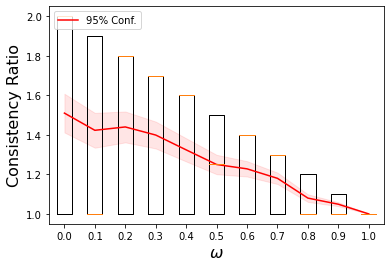

In [56]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### With Noisy Predictor
$\sigma \in [0,10, 2\times B]$ 

In [11]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg/opt

[1.434      1.5273226  1.4479951  1.48355678 1.4238429  1.51757243
 1.58056009 1.45629437 1.50143181 1.4843568 ]
[0.09417958 0.09262687 0.11050879 0.10420806 0.11290645 0.10968405
 0.09753819 0.10134273 0.11114406 0.11521299]


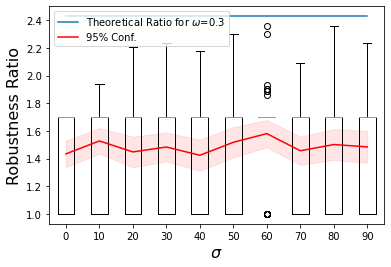

In [12]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (2-w)/ (1-w)
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Theoretical Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

## Experiment 2: RPOA($\omega$)

In [5]:
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

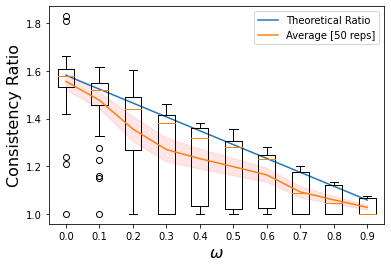

In [6]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [(np.exp(1)-0)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - 1)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [%d reps]"%alg_reps)
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



### With Noisy Predictor
$\sigma \in [0,10, 2\times B]$ 

In [7]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
alg_reps = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        alg_avg = alg_total/alg_reps
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg_avg/opt

[1.2948379  1.45798282 1.55337325 1.50119045 1.54113642 1.62621095
 1.58843087 1.50626898 1.61477597 1.61178754]
[0.04495649 0.05535504 0.05462999 0.05694617 0.05601813 0.06207821
 0.05610587 0.05690135 0.05982488 0.05852388]


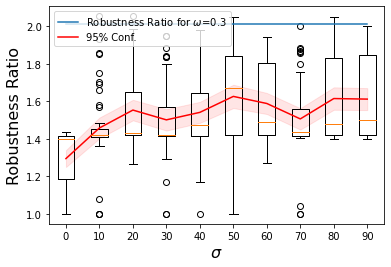

In [8]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (np.exp(1)-w)/ ((np.exp(1)-1) * (1-w) )
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Robustness Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')